In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

df = pd.read_csv('drugdata/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [2]:
df['Sex'] = df['Sex'].replace(['F', 'M'], [0, 1])
df['BP'] = df['BP'].replace(['HIGH', 'LOW', 'NORMAL'], [0, 1, 2])
df['Cholesterol'] = df['Cholesterol'].replace(['HIGH', 'NORMAL'], [0, 1])
df['Drug'] = df['Drug'].replace(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], [0, 1, 2, 3, 4])
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,1
2,47,1,1,0,10.114,1
3,28,0,2,0,7.798,2
4,61,0,1,0,18.043,0


In [3]:
X = df.loc[:, df.columns != 'Drug'].to_numpy()
y = df['Drug'].to_numpy()

X = torch.tensor(X).float()
y = torch.tensor(y)

In [39]:
torch.manual_seed(1)

class BirdNet(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        
        hidden = 128
        
        self.seq = nn.Sequential(
            nn.Linear(in_features, hidden),
            nn.Dropout(p=0.2),
            nn.ReLU(),
            nn.Linear(hidden, out_features)
        )
        
    def forward(self, x):
        return self.seq(x)
    
model = BirdNet(5, 5)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3)
total_loss = []

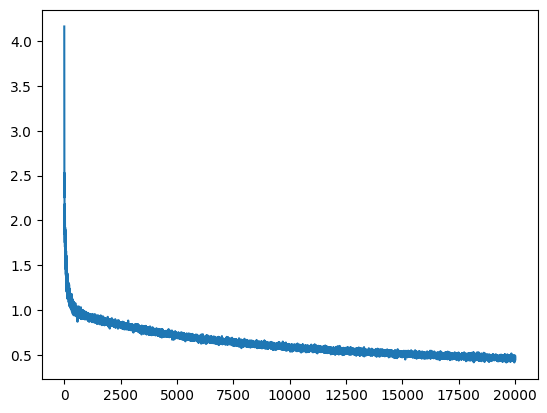

In [42]:
model.train()

for epoch in range(10000):
    optimizer.zero_grad()
    
    preds = model(X)
    loss = criterion(preds, y)
    
    loss.backward()
    optimizer.step()
    
    total_loss.append(loss.item())
    
plt.plot(total_loss)

In [43]:
model.eval()

with torch.no_grad():
    yhat = model(X)
    
(torch.argmax(yhat, dim=1) == y).sum() / len(yhat)

tensor(0.8300)